In [78]:
import pandas as pd
import numpy as np
calls = pd.read_csv('calls.csv')
internet = pd.read_csv('internet.csv')
messages = pd.read_csv('messages.csv')
tariffs = pd.read_csv('tariffs.csv')
users = pd.read_csv('users.csv')


Примечание
«Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. 
Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.
Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону.
Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.
Примите, что неиспользованные за предыдущий месяц звонки, смс, интернет на следующий месяц не переносятся.

Шаг 2. Подготовьте данные
Приведите данные к нужным типам;
Найдите и исправьте ошибки в данных, если они есть.
Поясните, какие ошибки вы нашли и как их исправили. В данных вы найдёте звонки с нулевой продолжительностью. Это не ошибка: нулями обозначены пропущенные звонки, поэтому их не нужно удалять.

In [79]:
calls.info()
calls.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [80]:
calls['duration'] = calls['duration'].apply(np.ceil).astype(int)
calls['call_date'] = pd.to_datetime(calls['call_date'], format ="%Y-%m-%d")
calls['call_date'].describe()

/var/folders/sp/vlkf_hcn5w19lnw7d31b0cl40000gn/T/ipykernel_15387/1474134969.py:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  calls['call_date'].describe()


count                  202607
unique                    365
top       2018-12-31 00:00:00
freq                     1435
first     2018-01-01 00:00:00
last      2018-12-31 00:00:00
Name: call_date, dtype: object

In [81]:
calls.head(10)


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0,1000
1,1000_1,2018-08-17,0,1000
2,1000_2,2018-06-11,3,1000
3,1000_3,2018-09-21,14,1000
4,1000_4,2018-12-15,6,1000
5,1000_5,2018-11-02,0,1000
6,1000_6,2018-10-18,0,1000
7,1000_7,2018-08-22,19,1000
8,1000_8,2018-09-15,19,1000
9,1000_9,2018-08-15,0,1000


В соответствии с заданием округлил минуты в большую сторону и
привел к программному формату столб даты звонка.

In [82]:
internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


Столбец Unnamed: 0 повторяет значения id, поэтому избавляюсь от него.
session date перевожу в программный формат.

In [83]:
internet = internet.drop(columns = ['Unnamed: 0'], axis = 1)
internet['session_date'] = pd.to_datetime(internet['session_date'], format ="%Y-%m-%d")
internet['session_date'].describe()

/var/folders/sp/vlkf_hcn5w19lnw7d31b0cl40000gn/T/ipykernel_15387/3296529391.py:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  internet['session_date'].describe()


count                  149396
unique                    365
top       2018-12-31 00:00:00
freq                     1057
first     2018-01-01 00:00:00
last      2018-12-31 00:00:00
Name: session_date, dtype: object

In [84]:
internet.head()

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


In [85]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format ="%Y-%m-%d")
messages.head()


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


Кроме перевода в программный формат даты здесь нечего делать.

In [86]:
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Этот дф вообще норм

In [87]:
users = users.rename(columns={'tariff':'tariff_name'})
users.head()


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff_name
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [88]:
users.isna().sum()

user_id          0
age              0
churn_date     462
city             0
first_name       0
last_name        0
reg_date         0
tariff_name      0
dtype: int64

In [89]:
users['churn_date'] = pd.to_datetime(users['churn_date'], format ="%Y-%m-%d")
users['reg_date'] = pd.to_datetime(users['reg_date'], format ="%Y-%m-%d")


Здесь понадобился только перевод даты. NaN в churn_date пока оставляю без изменений, так как не совсем понимаю что с этим делать.

Посчитайте для каждого пользователя:
- количество сделанных звонков и израсходованных минут разговора по месяцам;
- количество отправленных сообщений по месяцам;
- объем израсходованного интернет-трафика по месяцам;
- помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).

Количество звонков+минуты

In [104]:
# группирую звонки по юзерайди и месяцу
calls['month'] = calls['call_date'].dt.month
grouped_calls = calls.groupby(['user_id', 'month'])

# агреггирую по длительности и айди
aggregated_calls = grouped_calls.agg({'duration': 'sum', 'id': 'count'})

# избваляюсь от индекса и изменяю название столбца
df_user_calls = aggregated_calls.reset_index()
df_user_calls = df_user_calls.rename(columns={'id': 'total_calls_count'})
df_user_calls.head()

,user_id,month,duration,total_calls_count
0,1000,5,159,22
1,1000,6,172,43
2,1000,7,340,47
3,1000,8,408,52
4,1000,9,466,58


<AxesSubplot:>

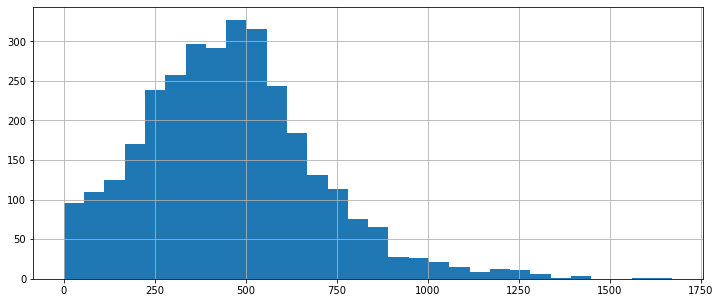

In [91]:
df_user_calls['duration'].hist(bins=30, figsize=(12,5))

Наблюдается резкое падение по количеству звонивших больше 850 минут в месяц.
Перехожу к группировке и анализу данных по сообщениям.

In [105]:
# группирую сообщения по юзерайди и месяцу
messages['month'] = messages['message_date'].dt.month
grouped_messages = messages.groupby(['user_id', 'month'])

# агреггирую по айди
aggregated_messages = grouped_messages.agg({'id': 'count'})

# избваляюсь от индекса и изменяю название столбца
df_user_messages = aggregated_messages.reset_index()
df_user_messages = df_user_messages.rename(columns={'id': 'total_messages_count'})
df_user_messages.head()

,user_id,month,total_messages_count
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57


Здесь столбец айди по непонятной причине не переименовывается, хотя дальше в дф отображается корректно

<AxesSubplot:>

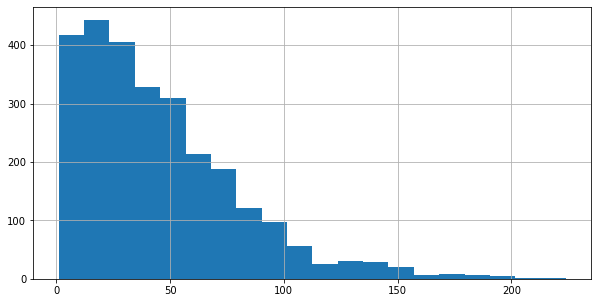

In [93]:
df_user_messages['id'].hist(bins=20, figsize=(10,5))

Основная масса отправляет до 110 сообщений в месяц.

Перехожу к изучению и анализу трафика.

In [116]:
# группирую данные трафика по юзерайди и месяцу
internet['month'] = internet['session_date'].dt.month
grouped_internet = internet.groupby(['user_id', 'month'])

# агреггирую по айди
aggregated_internet = grouped_internet.agg({'mb_used': 'sum'})

# избваляюсь от индекса и изменяю название столбца
df_user_internet = aggregated_internet.reset_index()
df_user_internet.rename(columns={'user_id': 'total_traffic_spent'})
df_user_internet.head()

,user_id,month,mb_used
0,1000,5,2253.49
1,1000,6,23233.77
2,1000,7,14003.64
3,1000,8,14055.93
4,1000,9,14568.91


<AxesSubplot:>

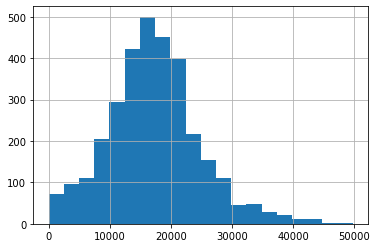

In [95]:
df_user_internet['mb_used'].hist(bins=20)

Видно четкие границы пользования трафиком по тарифам 15 и 30 Гб

Чтобы посчитать показатели помесячной выручки от каждого пользователя объедению эти три таблицы, а также добавлю инфо из users+tarrifs

In [123]:
df = df_user_calls.merge(df_user_messages, on=['user_id','month'], how='outer')
df = df.merge(df_user_internet, on=['user_id','month'], how = 'outer')
df = df.merge(users, on='user_id', how='left')
df = df.merge(tariffs, on='tariff_name', how='left')
df.head()

,user_id,month,duration,total_calls_count,total_messages_count,mb_used,age,churn_date,city,first_name,last_name,reg_date,tariff_name,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,159.0,22.0,22.0,2253.49,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1000,6,172.0,43.0,60.0,23233.77,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
2,1000,7,340.0,47.0,75.0,14003.64,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
3,1000,8,408.0,52.0,81.0,14055.93,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
4,1000,9,466.0,58.0,57.0,14568.91,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1


In [124]:
df['duration'] = df['duration'].fillna(0)
df['total_calls_count'] = df['total_calls_count'].fillna(0)
df['total_messages_count'] = df['total_messages_count'].fillna(0)
df['total_traffic_spent'] = df['mb_used'].fillna(0)

- Избавился от нулей

In [125]:
def calculate_revenue(row):
    """выручка для конкретного ряда"""
    messages = (row['total_messages_count'] - row['messages_included']) * row['rub_per_message']
    calls = (row['duration'] - row['minutes_included']) * row['rub_per_minute']
    traffic = np.ceil((row['total_traffic_spent'] - row['mb_per_month_included']) / 1024) * row['rub_per_gb']

    total = 0
    for cost in [messages, calls, traffic]:
        if cost > 0:
            total += cost
    return total

df['revenue'] = df.apply(lambda x: calculate_revenue(x), axis=1)
df['total_revenue'] = df['revenue'] + df['rub_monthly_fee']

# удаление ненужных столбов
columns_to_drop = ['first_name', 'last_name', 'messages_included', 'mb_per_month_included', 
                   'minutes_included', 'rub_monthly_fee', 'rub_per_gb', 'rub_per_message', 'rub_per_minute']
df = df.drop(columns=columns_to_drop, axis=1)

# перевожу в целочисленный
df['revenue'] = df['revenue'].astype(int)
df['total_revenue'] = df['total_revenue'].astype(int)

# топ 5 по доходности
df.sort_values(by='total_revenue').tail()

,user_id,month,duration,total_calls_count,total_messages_count,mb_used,age,churn_date,city,reg_date,tariff_name,total_traffic_spent,revenue,total_revenue
1793,1286,12,739.0,95.0,68.0,35108.07,19,NaT,Москва,2018-11-27,smart,35108.07,4771,5321
1622,1261,12,1074.0,141.0,22.0,32650.91,46,NaT,Казань,2018-10-30,smart,32650.91,5122,5672
3105,1486,11,764.0,108.0,96.0,36266.11,35,NaT,Нижний Новгород,2018-10-31,smart,36266.11,5130,5680
260,1042,12,728.0,121.0,75.0,37165.69,42,NaT,Хабаровск,2018-11-25,smart,37165.69,5159,5709
3106,1486,12,1007.0,133.0,83.0,38552.45,35,NaT,Нижний Новгород,2018-10-31,smart,38552.45,6220,6770


нашел помесячную выручку с каждого пользователя (вычтя бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножил на значение из тарифного плана; прибавил абонентскую плату, соответствующую тарифному плану).

- дальше буду анализировать поведение клиентов

- первый делом разговоры

In [128]:
aggregations = {
    'median': 'median',
    'mean': 'mean',
    'var': 'var',
    'std': 'std',
    'sum': 'sum'
}

df.pivot_table(
    index='tariff_name',
    values='duration',
    aggfunc=list(aggregations.values())
).droplevel(1, axis=1).style.format("{:.2f}")

,median,mean,var,std,sum
tariff_name,,,,,
smart,422.00,417.93,36219.32,190.31,931577.00
ultra,518.00,526.62,100873.63,317.61,518724.00


- минуты разговора

In [140]:
aggregations = {
    'median': 'median',
    'mean': 'mean',
    'var': 'var',
    'std': 'std',
    'sum': 'sum'
}

df.pivot_table(
    index='month',
    columns='tariff_name',
    values='duration',
    aggfunc=list(aggregations.values())
).droplevel(1, axis=1).style.format("{:.2f}")

,median,median,mean,mean,var,var,std,std,sum,sum
month,,,,,,,,,,
1,162.50,382.00,203.85,428.11,23787.34,72769.36,154.23,269.76,6931.00,3853.00
2,258.00,168.00,298.69,297.12,36412.29,87919.68,190.82,296.51,17324.00,7131.00
3,409.00,403.00,390.05,489.65,36823.16,111384.90,191.89,333.74,30034.00,18117.00
4,368.50,453.00,367.13,458.02,34778.21,71653.87,186.49,267.68,41119.00,25191.00
5,433.00,519.00,387.36,510.33,34820.06,83870.19,186.60,289.60,54618.00,34192.00
6,400.00,479.00,395.64,479.70,30742.92,91535.95,175.34,302.55,64885.00,40295.00
7,414.00,542.00,408.35,545.79,32250.27,94322.28,179.58,307.12,82079.00,49667.00
8,432.00,500.00,421.47,510.78,34793.58,97956.50,186.53,312.98,99045.00,54653.00
9,435.00,520.00,428.61,539.44,33535.34,105716.78,183.13,325.14,111439.00,62036.00


- Медиана, среднее, дисперсия и стандартное отклонение по месяцам

In [146]:
df_total_calls = df.pivot_table(
    index=['user_id', 'month', 'tariff_name'], 
    values='duration', 
    aggfunc='sum')

df_total_calls.head(10)

duration
user_id month tariff_name          
1000    5     ultra           159.0
        6     ultra           172.0
        7     ultra           340.0
        8     ultra           408.0
        9     ultra           466.0
        10    ultra           350.0
        11    ultra           338.0
        12    ultra           333.0
1001    11    smart           430.0
        12    smart           414.0

- количество звонков в месяц для каждого пользователя

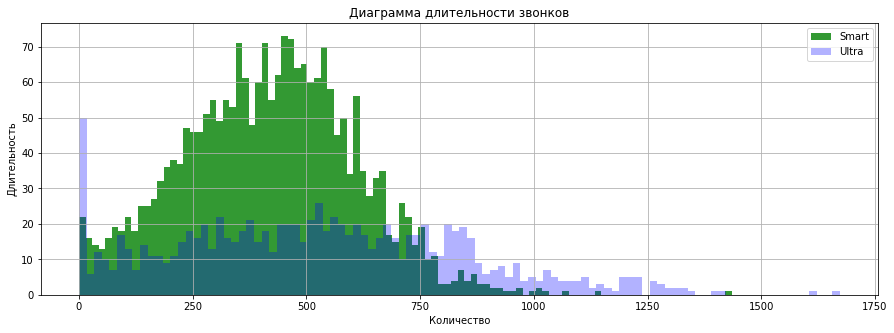

In [151]:
import matplotlib.pyplot as plt

SMART_CALL_LABEL = 'Smart'
ULTRA_CALL_LABEL = 'Ultra'

fig, ax = plt.subplots(figsize=(15, 5))

smart_calls = df.query('tariff_name == "smart"')['duration']
ultra_calls = df.query('tariff_name == "ultra"')['duration']


ax.hist(smart_calls, bins=100, alpha=0.8, color='green', label=SMART_CALL_LABEL)
ax.hist(ultra_calls, bins=100, alpha=0.3, color='blue', label=ULTRA_CALL_LABEL)

ax.set_title('Диаграмма длительности звонков')
ax.set_xlabel('Количество')
ax.set_ylabel('Длительность')
ax.grid(True)
ax.legend()

plt.show()

Выброс в данных около нуля. Вполне вероятно, что человек пользуется симкартой для раздачи вайфая через модем, ну или практически не звонит через мобильную связь (Как я)
- перехожу к сообщениям

In [152]:
aggregations = {
    'median': 'median',
    'mean': 'mean',
    'var': 'var',
    'std': 'std',
    'sum': 'sum'
}

df.pivot_table(
    index='tariff_name',
    values='total_messages_count',
    aggfunc=list(aggregations.values())
).droplevel(1, axis=1).style.format("{:.2f}")

,median,mean,var,std,sum
tariff_name,,,,,
smart,28.00,33.38,796.81,28.23,74413.00
ultra,38.00,49.36,2285.27,47.80,48623.00


- Данные по сообщениям

In [153]:
aggregations = {
    'median': 'median',
    'mean': 'mean',
    'var': 'var',
    'std': 'std',
    'sum': 'sum'
}

df.pivot_table(
    index='month',
    columns='tariff_name',
    values='total_messages_count',
    aggfunc=list(aggregations.values())
).droplevel(1, axis=1).style.format("{:.2f}")

,median,median,mean,mean,var,var,std,std,sum,sum
month,,,,,,,,,,
1,15.00,32.00,18.24,33.78,262.37,940.69,16.20,30.67,620.00,304.00
2,20.00,5.50,24.09,21.96,473.10,716.82,21.75,26.77,1397.00,527.00
3,23.00,20.00,31.86,32.30,718.49,1732.38,26.80,41.62,2453.00,1195.00
4,28.00,17.00,30.74,31.56,602.14,1407.29,24.54,37.51,3443.00,1736.00
5,30.00,25.00,33.77,37.85,730.99,1624.64,27.04,40.31,4762.00,2536.00
6,28.00,27.50,33.40,41.73,806.81,1986.30,28.40,44.57,5478.00,3505.00
7,29.00,38.00,33.75,49.85,799.89,2372.04,28.28,48.70,6784.00,4536.00
8,27.00,40.00,33.64,48.44,838.26,2171.74,28.95,46.60,7905.00,5183.00
9,30.00,43.00,33.64,52.29,790.62,2152.86,28.12,46.40,8746.00,6013.00


- Медиана, среднее, дисперсия и стандартное отклонение по месяцам

In [162]:
df_total_messages = df.pivot_table(
    index=['user_id', 'month', 'tariff_name'], 
    values='total_messages_count', 
    aggfunc='sum')

df_total_messages.head(10)

total_messages_count
user_id month tariff_name                      
1000    5     ultra                        22.0
        6     ultra                        60.0
        7     ultra                        75.0
        8     ultra                        81.0
        9     ultra                        57.0
        10    ultra                        73.0
        11    ultra                        58.0
        12    ultra                        70.0
1001    11    smart                         0.0
        12    smart                         0.0

- по месяцам для каждого юзера

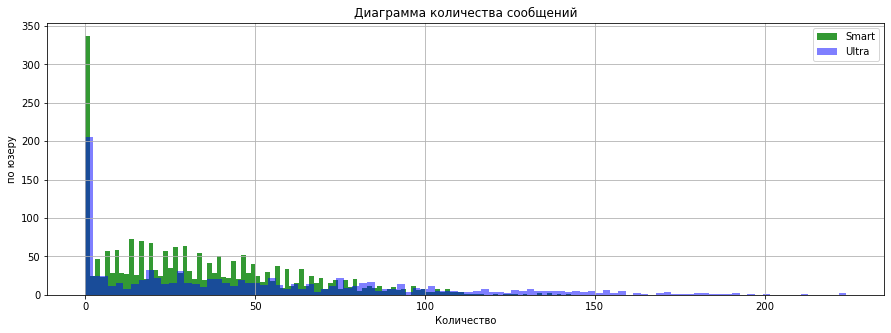

In [164]:
SMART_CALL_LABEL = 'Smart'
ULTRA_CALL_LABEL = 'Ultra'

fig, ax = plt.subplots(figsize=(15, 5))

smart_calls = df.query('tariff_name == "smart"')['total_messages_count']
ultra_calls = df.query('tariff_name == "ultra"')['total_messages_count']


ax.hist(smart_calls, bins=100, alpha=0.8, color='green', label=SMART_CALL_LABEL)
ax.hist(ultra_calls, bins=100, alpha=0.5, color='blue', label=ULTRA_CALL_LABEL)

ax.set_title('Диаграмма количества сообщений')
ax.set_xlabel('Количество')
ax.set_ylabel('по юзеру')
ax.grid(True)
ax.legend()

plt.show()

- выброс около нуля, причины как и с минутами разговора + основная масса до 100 сообщений
- перехожу к трафику

In [158]:
aggregations = {
    'median': 'median',
    'mean': 'mean',
    'var': 'var',
    'std': 'std',
    'sum': 'sum'
}

df.pivot_table(
    index='tariff_name',
    values='total_traffic_spent',
    aggfunc=list(aggregations.values())
).droplevel(1, axis=1).style.format("{:.2f}")

,median,mean,var,std,sum
tariff_name,,,,,
smart,16506.84,16208.39,34462496.46,5870.48,36128494.60
ultra,19308.01,19468.81,101751013.78,10087.17,19176773.13


- общие данные по трафику на тарифах

In [160]:
aggregations = {
    'median': 'median',
    'mean': 'mean',
    'var': 'var',
    'std': 'std',
    'sum': 'sum'
}

df.pivot_table(
    index='month',
    columns='tariff_name',
    values='total_traffic_spent',
    aggfunc=list(aggregations.values())
).droplevel(1, axis=1).style.format("{:.2f}")

,median,median,mean,mean,var,var,std,std,sum,sum
month,,,,,,,,,,
1,7096.19,14791.37,8513.72,13140.68,41533913.37,47132987.72,6444.68,6865.35,289466.40,118266.13
2,12553.71,7327.12,11597.05,11775.94,39029429.92,113308443.99,6247.35,10644.64,672629.15,282622.50
3,15670.25,17495.18,15104.16,17535.55,33968352.79,119941614.06,5828.24,10951.79,1163020.25,648815.36
4,14087.65,16645.78,13462.18,16828.13,32470042.72,94452154.82,5698.25,9718.65,1507764.23,925547.39
5,16323.94,18696.43,15805.18,19363.15,35739254.56,100924330.43,5978.23,10046.11,2228530.99,1297331.25
6,16077.44,19480.21,15794.65,18924.94,33537483.02,86357572.13,5791.16,9292.88,2590322.27,1589694.90
7,15925.29,20014.22,15743.15,20495.67,34776430.55,101308192.04,5897.15,10065.20,3164373.22,1865105.53
8,16833.49,18932.62,16610.72,19576.05,31287232.55,109758234.23,5593.50,10476.56,3903519.22,2094637.85
9,16028.43,19656.30,16303.58,19204.28,26999618.88,89985870.90,5196.12,9486.09,4238930.49,2208491.87


- по месяцам для каждого из тарифов

In [163]:
df_total_traffic_spent = df.pivot_table(
    index=['user_id', 'month', 'tariff_name'], 
    values='total_traffic_spent', 
    aggfunc='sum')

df_total_traffic_spent.head(10)

total_traffic_spent
user_id month tariff_name                     
1000    5     ultra                    2253.49
        6     ultra                   23233.77
        7     ultra                   14003.64
        8     ultra                   14055.93
        9     ultra                   14568.91
        10    ultra                   14702.49
        11    ultra                   14756.47
        12    ultra                    9817.61
1001    11    smart                   18429.34
        12    smart                   14036.66

- по каждому юзеру

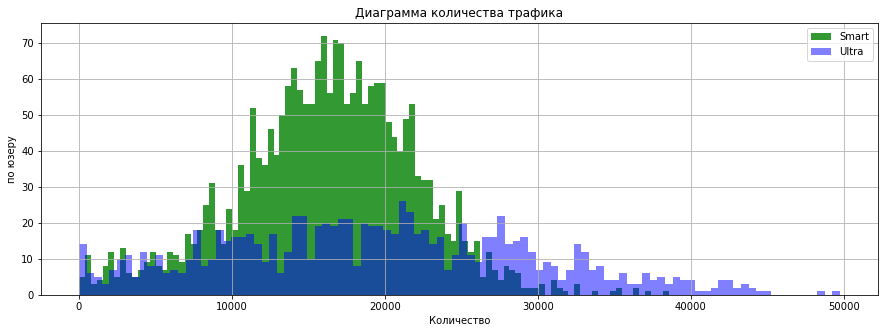

In [165]:
SMART_CALL_LABEL = 'Smart'
ULTRA_CALL_LABEL = 'Ultra'

fig, ax = plt.subplots(figsize=(15, 5))

smart_calls = df.query('tariff_name == "smart"')['total_traffic_spent']
ultra_calls = df.query('tariff_name == "ultra"')['total_traffic_spent']


ax.hist(smart_calls, bins=100, alpha=0.8, color='green', label=SMART_CALL_LABEL)
ax.hist(ultra_calls, bins=100, alpha=0.5, color='blue', label=ULTRA_CALL_LABEL)

ax.set_title('Диаграмма количества трафика')
ax.set_xlabel('Количество')
ax.set_ylabel('по юзеру')
ax.grid(True)
ax.legend()

plt.show()

- "смарт" и правда смарт

проверка гипотез
- средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
- средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.
Пороговое значение alpha задайте самостоятельно.
Поясните:
- как вы формулировали нулевую и альтернативную гипотезы;
- какой критерий использовали для проверки гипотез и почему.

In [177]:
# h0 smart_revenue = ultra_revenue
# h1 smart_revenue != ultra_revenue
import scipy
from scipy import stats
smart_revenue = df.query('tariff_name == "smart"')['total_revenue']
ultra_revenue = df.query('tariff_name == "ultra"')['total_revenue']
alpha = 0.1

results = scipy.stats.ttest_ind(smart_revenue, ultra_revenue)

if results.pvalue < alpha:
    print("Отвергаем нулевую")
else:
    print("Нулевая правдива")

Отвергаем нулевую


In [178]:
smart_revenue.mean()


1289.9735307312696

In [179]:
smart_revenue.sum()

2875351

In [180]:
ultra_revenue.mean()

2070.1522842639592

In [181]:
ultra_revenue.sum()

2039100

- средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов. Пороговое значение alpha задайте самостоятельно. 

In [182]:
# h0 МАСКВА > БАГДАД
# h1 МАСКВА < БАГДАД
МАСКВА = df.query('city == "Москва"')['total_revenue']
БАГДАД = df.query('city != "Москва"')['total_revenue']
alpha = 0.1

results = scipy.stats.ttest_ind(МАСКВА, БАГДАД)

if results.pvalue < alpha:
    print("Отвергаем нулевую")
else:
    print("Нулевая правдива")

Нулевая правдива


In [183]:
МАСКВА.mean()

1546.7135842880523

In [184]:
БАГДАД.mean()

1524.9362274298885

В отчете представлены следующие данные:

- Некоторые пользователи не используют все возможности своего тарифа и имеют нулевые значения.
- Пользователи тарифа Ультра в среднем больше звонят, отправляют сообщения и используют интернет-трафик, чем пользователи тарифа Смарт.
- Средняя выручка на тарифе Ультра выше, чем на тарифе Смарт, но общая выручка на тарифе Смарт больше из-за большего количества пользователей.
- Средняя выручка от жителей Москвы и других городов практически не отличается, но большую часть прибыли приносят пользователи из других регионов России.

В целом, отчет показывает, что пользователи тарифа Ультра в среднем используют больше услуг, но при этом средняя выручка на тарифе Смарт выше, чем на тарифе Ультра. Также отчет показывает, что большую часть прибыли приносят пользователи из других регионов России, а не только из Москвы. Эти данные могут быть полезны для оптимизации бизнес-стратегии компании. Например, компания может рассмотреть возможность увеличения количества пользователей на тарифе Ультра, ведь они приносят большую выручку в среднем. Также компания может рассмотреть возможность улучшения условий на тарифе Смарт, чтобы привлечь больше пользователей и увеличить общую выручку. Кроме того, компания может обратить внимание на регионы, из которых приходит большая часть прибыли, и разработать маркетинговые стратегии, направленные на увеличение колества пользователей в этих регионах. Это может включать в себя проведение рекламных кампаний, предложение специальных акций и скидок, а также улучшение качества обслуживания в этих регионах.

Кроме того, отчет может помочь компании лучше понять поведение и потребности своих клиентов. Например, компания может увидеть, что пользователи тарифа Смарт не используют все возможности своего тарифа и разработать стратегии, направленные на увеличение использования услуг. Также компания может обратить внимание на различия в использовании услуг в разных регионах и адаптировать свои услуги и маркетинговые стратегии под потребности клиентов в каждом регионе.

В целом, отчет предоставляет компании ценную информацию о ее клиентах и бизнесе в целом, что может помочь ей оптимизировать свои стратегии и улучшить свои результаты. Компания может использовать эту информацию для принятия решений о том, какие услуги развивать, какие регионы приоритетны для развития, какие маркетинговые кампании запускать и как улучшать качество обслуживания клиентов. В результате, компания сможет улучшить свою конкурентоспособность и удовлетворить потребности своих клиентов лучше, что приведет к росту прибыли и удовлетворенности клиентов. Кроме того, на основе отчета компания может разработать новые продукты и услуги, которые будут лучше отвечать потребностям клиентов и увеличивать их лояльность. В итоге, отчет является важным инструментом для развития бизнеса и принятия эффективных решений в компании.
